In [1]:
# Standard imports
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/coordinates_and_lipizones.csv')

In [3]:
type(df['lipotype'].unique())

numpy.ndarray

In [4]:
#rename the unnamed column to 'id'
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df

,id,x_ccf,y_ccf,z_ccf,Section,x_index,y_index,z_index,lipotype
0,section1_pixel17_100,4.409796,1.227594,7.131945,1,158,49,287,level_11_1642.0
1,section1_pixel17_105,4.412813,1.206127,6.998784,1,158,48,282,level_9_419.0
2,section1_pixel17_106,4.413417,1.201827,6.972198,1,158,48,281,level_4_15.0
3,section1_pixel17_107,4.414021,1.197525,6.945627,1,158,47,280,level_7_97.0
4,section1_pixel17_108,4.414626,1.193223,6.919072,1,158,47,278,level_11_1642.0
...,...,...,...,...,...,...,...,...,...
2009836,section31_pixel237_202,13.218154,7.413906,4.458864,31,515,296,178,level_6_37.0
2009837,section31_pixel238_193,13.218154,7.482028,4.678807,31,515,298,187,level_4_15.0
2009838,section31_pixel238_194,13.218154,7.477240,4.653951,31,515,298,186,level_6_37.0
2009839,section31_pixel238_199,13.218154,7.453215,4.529396,31,515,297,180,level_6_37.0


In [5]:
[            {       
                "label": level + " " + nb + " " + lipotype.replace(".0", ""),
                "value": level + " " + nb + " " + lipotype.replace(".0", ""),
                "group": level + " " + nb,
            }
            for level, nb, lipotype in sorted([s.split("_") for s in df.lipotype.unique()], key=lambda x: (int(x[1]), float(x[2])))
        ]

[{'label': 'level 4 1', 'value': 'level 4 1', 'group': 'level 4'},
 {'label': 'level 4 2', 'value': 'level 4 2', 'group': 'level 4'},
 {'label': 'level 4 3', 'value': 'level 4 3', 'group': 'level 4'},
 {'label': 'level 4 4', 'value': 'level 4 4', 'group': 'level 4'},
 {'label': 'level 4 5', 'value': 'level 4 5', 'group': 'level 4'},
 {'label': 'level 4 15', 'value': 'level 4 15', 'group': 'level 4'},
 {'label': 'level 4 16', 'value': 'level 4 16', 'group': 'level 4'},
 {'label': 'level 5 15', 'value': 'level 5 15', 'group': 'level 5'},
 {'label': 'level 6 21', 'value': 'level 6 21', 'group': 'level 6'},
 {'label': 'level 6 22', 'value': 'level 6 22', 'group': 'level 6'},
 {'label': 'level 6 23', 'value': 'level 6 23', 'group': 'level 6'},
 {'label': 'level 6 26', 'value': 'level 6 26', 'group': 'level 6'},
 {'label': 'level 6 28', 'value': 'level 6 28', 'group': 'level 6'},
 {'label': 'level 6 32', 'value': 'level 6 32', 'group': 'level 6'},
 {'label': 'level 6 37', 'value': 'level 6 3

In [6]:
df["level"] = df.lipotype.apply(lambda x: int(x.split("_")[1]))
df["value"] = df.lipotype.apply(lambda x: float(x.split("_")[2]))
df['slice'] = [int(x.split('_')[0].replace('section', '')) for x in df.id]
df

,id,x_ccf,y_ccf,z_ccf,Section,x_index,y_index,z_index,lipotype,level,value,slice
0,section1_pixel17_100,4.409796,1.227594,7.131945,1,158,49,287,level_11_1642.0,11,1642.0,1
1,section1_pixel17_105,4.412813,1.206127,6.998784,1,158,48,282,level_9_419.0,9,419.0,1
2,section1_pixel17_106,4.413417,1.201827,6.972198,1,158,48,281,level_4_15.0,4,15.0,1
3,section1_pixel17_107,4.414021,1.197525,6.945627,1,158,47,280,level_7_97.0,7,97.0,1
4,section1_pixel17_108,4.414626,1.193223,6.919072,1,158,47,278,level_11_1642.0,11,1642.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2009836,section31_pixel237_202,13.218154,7.413906,4.458864,31,515,296,178,level_6_37.0,6,37.0,31
2009837,section31_pixel238_193,13.218154,7.482028,4.678807,31,515,298,187,level_4_15.0,4,15.0,31
2009838,section31_pixel238_194,13.218154,7.477240,4.653951,31,515,298,186,level_6_37.0,6,37.0,31
2009839,section31_pixel238_199,13.218154,7.453215,4.529396,31,515,297,180,level_6_37.0,6,37.0,31


In [7]:
[            {       
                "label": lipotype,
                "value": "level" + "_" + str(level) + "_" + str(lipotype),
                "group": "level" + " " + str(level),
            }
            for level in sorted(df.level.unique(), key=lambda x: int(x))
            for lipotype in sorted(df.value.unique(), key=lambda x: float(x))
        ]

[{'label': 1.0, 'value': 'level_4_1.0', 'group': 'level 4'},
 {'label': 2.0, 'value': 'level_4_2.0', 'group': 'level 4'},
 {'label': 3.0, 'value': 'level_4_3.0', 'group': 'level 4'},
 {'label': 4.0, 'value': 'level_4_4.0', 'group': 'level 4'},
 {'label': 5.0, 'value': 'level_4_5.0', 'group': 'level 4'},
 {'label': 15.0, 'value': 'level_4_15.0', 'group': 'level 4'},
 {'label': 16.0, 'value': 'level_4_16.0', 'group': 'level 4'},
 {'label': 21.0, 'value': 'level_4_21.0', 'group': 'level 4'},
 {'label': 22.0, 'value': 'level_4_22.0', 'group': 'level 4'},
 {'label': 23.0, 'value': 'level_4_23.0', 'group': 'level 4'},
 {'label': 26.0, 'value': 'level_4_26.0', 'group': 'level 4'},
 {'label': 28.0, 'value': 'level_4_28.0', 'group': 'level 4'},
 {'label': 32.0, 'value': 'level_4_32.0', 'group': 'level 4'},
 {'label': 37.0, 'value': 'level_4_37.0', 'group': 'level 4'},
 {'label': 38.0, 'value': 'level_4_38.0', 'group': 'level 4'},
 {'label': 40.0, 'value': 'level_4_40.0', 'group': 'level 4'},
 {

In [8]:
level=4
slice_index=33
lipotype=1.0

df.index[
        (df["level"] == level)
        & (df["slice"] == slice_index)
        & (df["value"] == lipotype)
        ].tolist()

[]

In [9]:
section1_df = df[df["Section"] == 1]
section1_df

,id,x_ccf,y_ccf,z_ccf,Section,x_index,y_index,z_index,lipotype,level,value,slice
0,section1_pixel17_100,4.409796,1.227594,7.131945,1,158,49,287,level_11_1642.0,11,1642.0,1
1,section1_pixel17_105,4.412813,1.206127,6.998784,1,158,48,282,level_9_419.0,9,419.0,1
2,section1_pixel17_106,4.413417,1.201827,6.972198,1,158,48,281,level_4_15.0,4,15.0,1
3,section1_pixel17_107,4.414021,1.197525,6.945627,1,158,47,280,level_7_97.0,7,97.0,1
4,section1_pixel17_108,4.414626,1.193223,6.919072,1,158,47,278,level_11_1642.0,11,1642.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37950,section1_pixel213_138,3.704598,6.245334,5.319405,1,130,249,213,level_7_108.0,7,108.0,1
37951,section1_pixel213_139,3.705035,6.242227,5.294602,1,130,249,212,level_8_201.0,8,201.0,1
37952,section1_pixel214_130,3.697086,6.298784,5.519426,1,129,251,221,level_9_424.0,9,424.0,1
37953,section1_pixel214_131,3.697580,6.295269,5.494048,1,129,251,220,level_4_15.0,4,15.0,1


In [14]:
# remove duplicates in the lipotype column
df.drop_duplicates(subset=['lipotype'], inplace=True)
df

,id,x_ccf,y_ccf,z_ccf,Section,x_index,y_index,z_index,lipotype,level,value,slice
0,section1_pixel17_100,4.409796,1.227594,7.131945,1,158,49,287,level_11_1642.0,11,1642.0,1
1,section1_pixel17_105,4.412813,1.206127,6.998784,1,158,48,282,level_9_419.0,9,419.0,1
2,section1_pixel17_106,4.413417,1.201827,6.972198,1,158,48,281,level_4_15.0,4,15.0,1
3,section1_pixel17_107,4.414021,1.197525,6.945627,1,158,47,280,level_7_97.0,7,97.0,1
24,section1_pixel18_108,4.410868,1.219961,6.914298,1,158,48,278,level_11_1641.0,11,1641.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1445035,section21_pixel91_95,10.552873,2.654752,8.538029,21,407,106,345,level_14_12778.0,14,12778.0,21
1483511,section21_pixel234_242,9.604446,6.458682,4.995562,21,369,258,200,level_14_7861.0,14,7861.0,21
1518248,section22_pixel165_126,11.311469,4.542833,7.494809,22,438,181,302,level_14_7866.0,14,7866.0,22
1518539,section22_pixel166_92,11.350030,4.663022,8.230598,22,439,186,332,level_14_7878.0,14,7878.0,22


In [18]:
# get a list of the lipotypes
lipotypes = df['lipotype'].unique()
lipotypes

array(['level_11_1642.0', 'level_9_419.0', 'level_4_15.0', 'level_7_97.0',
       'level_11_1641.0', 'level_9_400.0', 'level_10_822.0',
       'level_7_111.0', 'level_4_16.0', 'level_6_41.0', 'level_6_44.0',
       'level_7_90.0', 'level_10_840.0', 'level_9_342.0', 'level_7_102.0',
       'level_10_786.0', 'level_8_201.0', 'level_9_418.0',
       'level_11_1645.0', 'level_7_93.0', 'level_12_3263.0',
       'level_14_12202.0', 'level_9_198.0', 'level_12_3268.0',
       'level_14_12296.0', 'level_10_833.0', 'level_14_12295.0',
       'level_13_6396.0', 'level_11_1667.0', 'level_12_3265.0',
       'level_11_1634.0', 'level_14_12200.0', 'level_13_6394.0',
       'level_14_12181.0', 'level_14_12182.0', 'level_7_72.0',
       'level_7_108.0', 'level_14_12199.0', 'level_11_1596.0',
       'level_14_12205.0', 'level_11_1678.0', 'level_13_6337.0',
       'level_10_825.0', 'level_14_12194.0', 'level_7_89.0',
       'level_14_12193.0', 'level_14_12206.0', 'level_14_12204.0',
       'level_13_6335

In [ ]:
image2 = np.zeros((918, 1311, 33), dtype=np.uint8)

# fill the image with the values from the dataframe
for index, row in df.iterrows():
    image2[row["y_index"], row["z_index"], row["Section"]-1] = int(255)

In [35]:
image2[287][49][0]

0.0

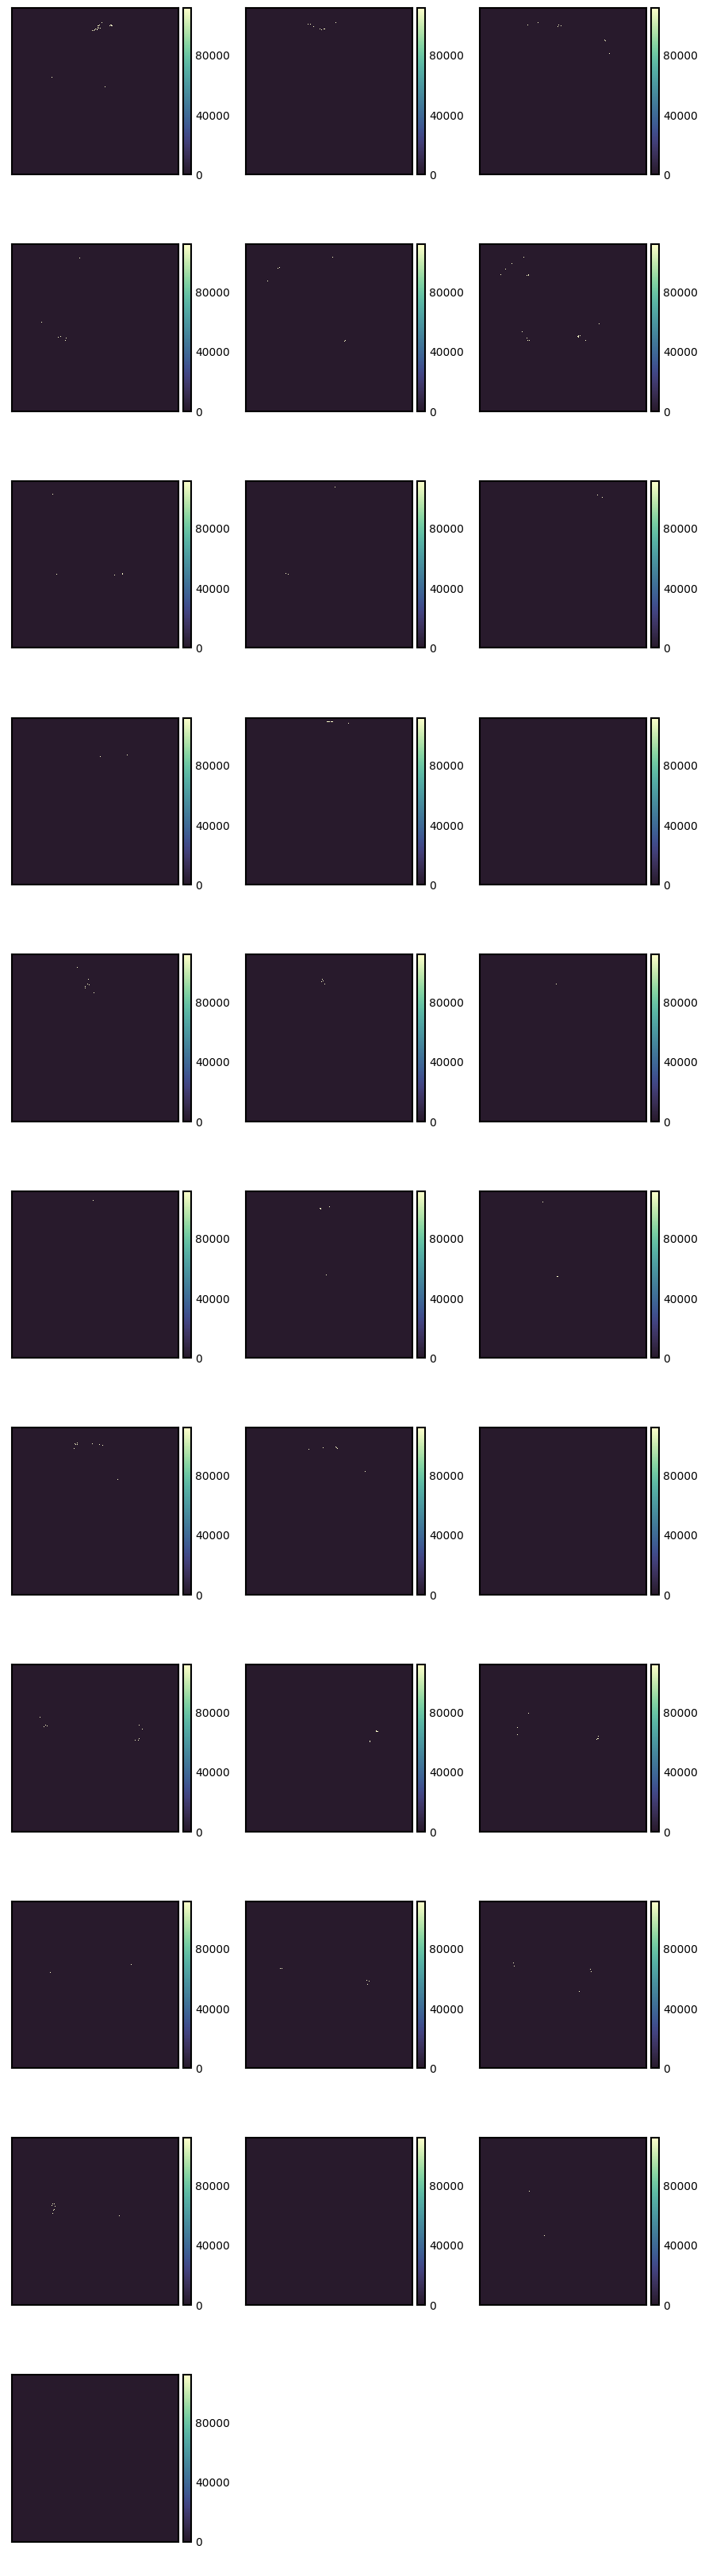

In [36]:
import seaborn_image as isns
# plot the y_index and z_index in a image grid
isns.ImageGrid(data=image2,)

In [37]:
import os

# Move to root directory for easier module handling
os.chdir("../..")
print(os.listdir("."))

#LBAE imports
from modules.maldi_data import MaldiData
from modules.figures import Figures
from modules.atlas import Atlas
from modules.storage import Storage
from modules.scRNAseq import ScRNAseq

['.git', '.gitattributes', '.github', '.gitignore', '.mypy_cache', '.vscode', 'app.py', 'assets', 'config.py', 'data', 'data_sample', 'Dockerfile', 'docs', 'index.py', 'in_app_documentation', 'js', 'LICENSE.md', 'main.py', 'mkdocs.yml', 'modules', 'notebooks', 'pages', 'readme', 'README.md', 'remaining_TODOs.md', 'requirements.txt', 'site', 'style', '__pycache__']


In [38]:
path_data = "data/whole_dataset/"
path_annotations = "data/annotations/"
path_db = "data/app_data/data.db"

# Load shelve database
storage = Storage(path_db)

# Load data
data = MaldiData(path_data, path_annotations)

# Load Atlas and Figures objects. At first launch, many objects will be precomputed and shelved in
# the classes Atlas and Figures.
atlas = Atlas(data, storage, resolution=25, sample = False)
scRNAseq = ScRNAseq()
figures = Figures(data, storage, atlas, scRNAseq, sample=False)

In [39]:
import skimage

im = skimage.io.imread(
                "data/tiff_files/coordinates_warped_data.tif"
            )

In [40]:
im.shape

(64, 918, 1311, 3)

In [41]:
from modules.tools.atlas import (
    project_atlas_mask,
    get_array_rows_from_atlas_mask,
    fill_array_projection,
    solve_plane_equation,
    compute_simplified_atlas_annotation,
    compute_array_images_atlas,
)

In [42]:
atlas.array_coordinates_warped_data[33].shape

(918, 1311, 3)

In [43]:
l_transform_parameters = []
for slice_index in range(atlas.array_coordinates_warped_data.shape[0]):
    a_atlas, u_atlas, v_atlas = solve_plane_equation(
        atlas.array_coordinates_warped_data[slice_index]
    )
    l_transform_parameters.append((a_atlas, u_atlas, v_atlas))

In [44]:
atlas.l_original_coor[32][214][132]

array([3.5177321, 6.4673095, 5.472843 ], dtype=float32)

In [70]:
from modules.tools.spectra import (
    compute_image_using_index_and_image_lookup,
    compute_index_boundaries,
    compute_avg_intensity_per_lipid,
    global_lipid_index_store,
    compute_thread_safe_function,
)


In [122]:
image = np.zeros((31, 918, 1311), dtype=np.uint8)

for i in range(0, 31):
    image[i] = figures.compute_image_per_lipid(
                33+i,
                800,
                802,
            )

image = np.transpose(image, (1, 2, 0))

In [123]:
image2 = np.zeros((918, 1311, 31), dtype=np.uint8)

# fill the image with the values from the dataframe
for index, row in df.iterrows():
    image2[row["y_index"], row["z_index"], row["Section"]-1] = int(255)

In [124]:
image += image2

In [125]:
image.shape

(918, 1311, 31)

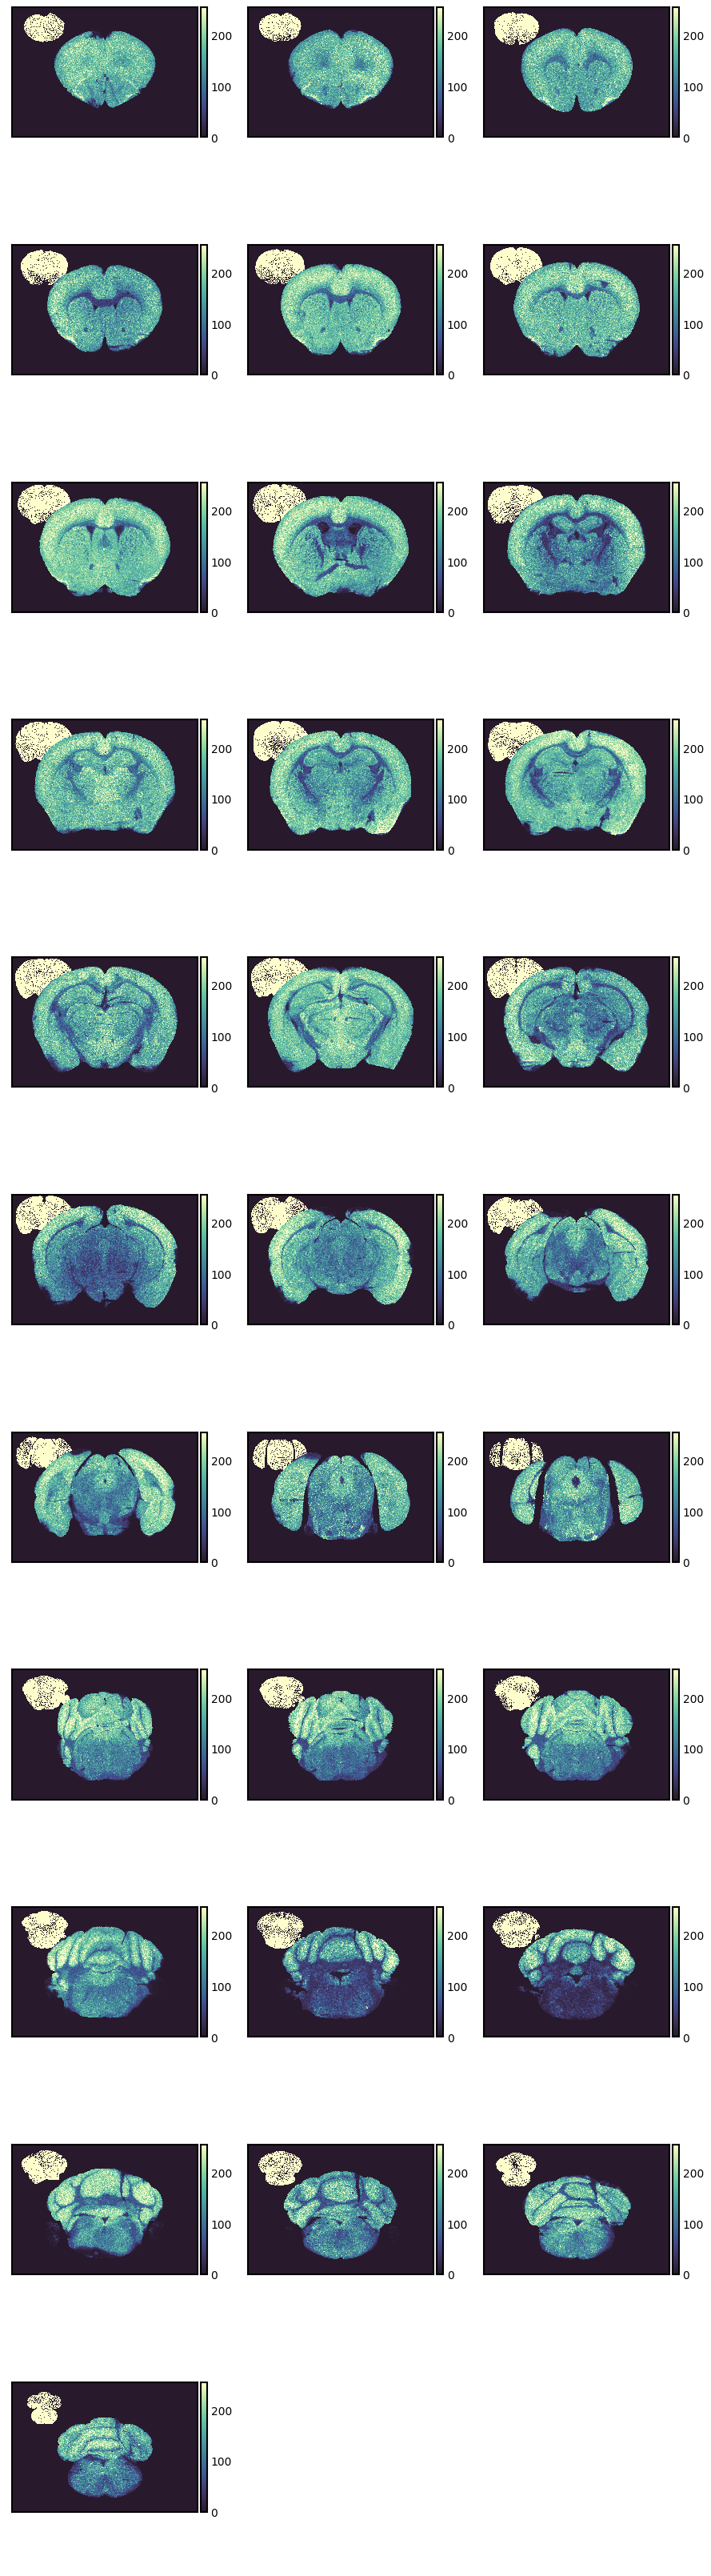

In [126]:
isns.ImageGrid(data=image,)